In [2]:
import numpy as np
import matplotlib.pyplot as plt

In [3]:
# Initialization
log_x_array = np.load('log_x.npy')
log_dx = np.load('log_dx.npy')
log_q = np.load('log_q.npy')
log_qdot = np.load('log_qdot.npy')
log_rdot = np.load('log_rdot.npy')
log_dqdot = np.load('log_dqdot.npy')
# log_dx = np.load('log_dx.npy')
log_theta_k_array = np.load('log_theta_k.npy')
log_theta_z_array = np.load('log_theta_z.npy')
log_z_hat_array = np.load('log_z_hat.npy')
log_d_array = np.load('log_d.npy')

ros_freq = 30
dx = np.array([[720],[540]])

In [4]:
# task space velocity
# plt.figure(figsize=(30,20))
# for j in range(6):
#     ax = plt.subplot(3, 2, j+1)
#     ax.set_title('Cartesian space velocity %d' % (j+1),fontsize=20)
#     plt.xlabel('time (s)')
#     if j<3:
    #     plt.ylabel('velocity (m/s)', fontsize = 18)
    # else:
    #     plt.ylabel('angular velocity (rad/s)',fontsize = 18)

    # plt.plot(np.linspace(0,np.shape(log_rdot)[1]/ros_freq,np.shape(log_rdot)[1]),np.reshape(np.array(log_rdot[j,:]),[-1,]) )
# plt.savefig('log_r.jpg')

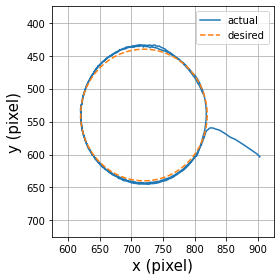

In [15]:
# vision space position
# fig = plt.figure()
label_font = {'size': 15}
tick_size = 10
legend_size = 10
plt.figure(figsize=(4, 4))
plt.plot(log_x_array[:,0], log_x_array[:,1], label = 'actual')
# plt.plot(log_dx[:, 0], log_dx[:, 1], ":", label = 'desired')
circle_x = np.cos(np.deg2rad(range(0, 360))) * 100 + 720
circle_y = np.sin(np.deg2rad(range(0, 360))) * 100 + 540
plt.plot(circle_x, circle_y, "--", label = 'desired')
plt.legend(fontsize = legend_size)
# plt.title('vision space trajectory')
plt.xlabel('x (pixel)', fontdict=label_font)
plt.ylabel('y (pixel)', fontdict=label_font)
plt.xticks(fontsize = tick_size)
plt.yticks(fontsize = tick_size)
plt.xlim([575, 925])
plt.ylim([725, 375])
plt.grid()
plt.tight_layout()
plt.savefig('expr2_position.jpg', bbox_inches = 'tight', dpi = 300, pad_inches=0.015)
plt.savefig('expr2_position.pdf', bbox_inches = 'tight', pad_inches = 0.015)
# plt.savefig('expr2_position.pdf')

In [6]:
# vision space position verse time
# int_err_figsize = (8, 3.7)
# plt.figure(figsize=int_err_figsize)
# plt.plot(np.linspace(0,np.shape(log_rdot)[1]/ros_freq,np.shape(log_rdot)[1]), log_x_array[:,0]-dx[0],label = 'x')
# plt.plot(np.linspace(0,np.shape(log_rdot)[1]/ros_freq,np.shape(log_rdot)[1]), log_x_array[:,1]-dx[1],label = 'y')
# plt.legend(fontsize = legend_size)
# # plt.title('vision space error')
# plt.xlabel('time (s)', fontdict = label_font)
# plt.ylabel('error (pixel)', fontdict = label_font)
# plt.xticks(fontsize = tick_size)
# plt.yticks(fontsize = tick_size)
# plt.xlim([0, np.shape(log_rdot)[1]/ros_freq])
# plt.grid()
# plt.savefig('expr2_err_center.jpg', bbox_inches = 'tight', dpi = 300, pad_inches = 0.015)

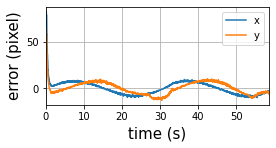

In [7]:
# vision space position verse time
int_err_figsize = (4, 1.8)
plt.figure(figsize=int_err_figsize)
plt.plot(np.linspace(0,np.shape(log_rdot)[1]/ros_freq,np.shape(log_rdot)[1]), log_x_array[:,0] - log_dx[:,0],label = 'x')
plt.plot(np.linspace(0,np.shape(log_rdot)[1]/ros_freq,np.shape(log_rdot)[1]), log_x_array[:,1] - log_dx[:,1],label = 'y')
plt.legend(fontsize = legend_size)
# plt.title('vision space error')
plt.xlabel('time (s)', fontdict = label_font)
plt.ylabel('error (pixel)', fontdict = label_font)
plt.xticks(fontsize = tick_size)
plt.yticks(fontsize = tick_size)
plt.xlim([0, np.shape(log_rdot)[1]/ros_freq])
plt.grid()
plt.savefig('expr2_err.jpg', bbox_inches = 'tight', dpi = 300, pad_inches = 0.015)
plt.savefig('expr2_err.pdf', bbox_inches = 'tight', pad_inches=0.015)

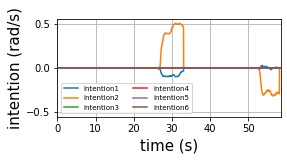

In [8]:
# intention
y0_placed_to_mid = True
legend_size = 7

plt.figure(figsize=int_err_figsize)
for j in range(log_d_array.shape[1]):
    plt.plot(np.linspace(0,np.shape(log_qdot)[1]/ros_freq,np.shape(log_qdot)[1]),log_d_array[:,j],label = 'intention'+str(j+1))
plt.legend(fontsize = legend_size, ncol = 2)
plt.xlabel('time (s)', fontdict = label_font)
plt.ylabel('intention (rad/s)', fontdict = label_font)
plt.xticks(fontsize = tick_size)
plt.yticks(fontsize = tick_size)
plt.xlim([0, np.shape(log_rdot)[1]/ros_freq])
if y0_placed_to_mid:
    max_value = np.max(log_d_array)
    min_value = np.min(log_d_array)
    extreme = max_value if max_value > -min_value else -min_value
    extreme *= 1.1
    plt.ylim([-extreme, extreme])
plt.grid()
plt.savefig('expr2_intention.jpg', bbox_inches = 'tight', dpi = 300, pad_inches = 0.015)
plt.savefig('expr2_intention.pdf', bbox_inches = 'tight', pad_inches=0.015)

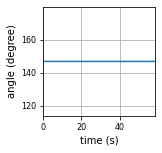

In [9]:
# joint
label_font = {'size': 10}
tick_size = 8
plot_by_extreme = [False, True, True, True, False, False]
joint_val = []
joint_val_extreme = []
joint_val_delta_extreme = []
plt.figure(figsize = (2, 2))

for j in range(6):
    joint_val.append(np.rad2deg(np.reshape(np.array(log_q[j,:]),[-1,])))
    joint_val_extreme.append([np.max(joint_val[j]), np.min(joint_val[j])])
    joint_val_delta_extreme.append(joint_val_extreme[j][0] - joint_val_extreme[j][1])

space = np.max(joint_val_delta_extreme) / 2
space *= 1.1

for j in range(6):
    # plt.subplot(1, 6, j+1)
    plt.clf()
    plt.xlabel('time (s)', fontdict=label_font)
    plt.ylabel('angle (degree)', fontdict=label_font)
    plt.xticks(fontsize = tick_size)
    plt.yticks(fontsize = tick_size)
    plt.plot(np.linspace(0, np.shape(log_qdot)[1]/ros_freq, np.shape(log_qdot)[1]), joint_val[j])
    if plot_by_extreme[j]:
        mid = (joint_val_extreme[j][0] + joint_val_extreme[j][1]) / 2
        plt.ylim([mid - space, mid + space])
    else:
        means = np.mean(joint_val[j])
        plt.ylim([means - space, means + space])
    plt.xlim([0, np.shape(log_qdot)[1]/ros_freq])
    plt.grid()
    # plt.subplots_adjust(top=1, bottom=0, right=1, left=0, hspace=0, wspace=0)
    # plt.margins(0,0)
    plt.savefig('expr2_joint' + str(j) + '.jpg', pad_inches = 0.012, bbox_inches = 'tight', dpi = 300)
    plt.savefig('expr2_joint' + str(j) + '.pdf', pad_inches = 0.012, bbox_inches = 'tight')
# plt.savefig('log_joint.jpg')

In [10]:
# joint space velocity
# plt.figure(figsize=(30,20))
# for j in range(6):
#     ax = plt.subplot(3, 2, j+1)
#     ax.set_title('joint space velocity %d' % (j+1),fontsize=20)
#     plt.xlabel('time (s)')
#     plt.ylabel('velocity (m/s)')

#     plt.plot(np.linspace(0,np.shape(log_qdot)[1]/ros_freq,np.shape(log_qdot)[1]),np.reshape(np.array(log_qdot[j,:]),[-1,]) )
    # plt.plot(np.linspace(0,np.shape(log_drdot)[1]/ros_freq,np.shape(log_drdot)[1]),log_drdot[j,:].reshape(-1,))
# plt.savefig('log_qdot.jpg')

In [11]:
# theta_k
# plt.figure()
# for j in range(15):
#     lab = r'$\theta_k('+str(j+1)+')$'
#     plt.plot(np.linspace(0,np.shape(log_qdot)[1]/ros_freq,np.shape(log_qdot)[1]),    log_theta_k_array[:,j]-log_theta_k_array[0,j],label = lab)
#     plt.xlabel('time (s)')
#     plt.title(r'elements of $\hat \theta_k$')
#     plt.legend()
# plt.savefig('log_thetak.jpg')